#**GDG TASK 1**


#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [66]:
!pip install ydata-profiling -q

Mount your Google Drive onto this notebook.

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import basic libraries.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#loading the dataset

In [69]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task1.csv")

In [70]:
# read dataset into a variable

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [71]:
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [72]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [73]:
df.drop('id', axis=1, inplace=True)

Display the the number of rows and columns in this dataset.

In [74]:
df.shape


(74051, 9)

Use the info() function to get, well, info about it.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [76]:
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

Write a function to print all the unique values in the columns of Sex and Age.

In [77]:
print(df['Sex'].unique())
print(df['Age'].unique())

['I' 'M' 'F']
[ 9  8 11 10 12  7  5 14  6 13 16  4 18 15 17  3 19 23 21 20 26 22 27 24
 25 29  2  1]


List out the number of crabs belonging to each gender.

In [78]:
print(df['Sex'].value_counts())

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [79]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [80]:
df.drop(df[df['Height'] == 0].index, inplace=True)

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [81]:
df.shape

(74027, 9)

#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [82]:
# the logic of this plot is to basically display the relation of different age groups and different genders.

x axis will contain Sex, and y axis has the average age.

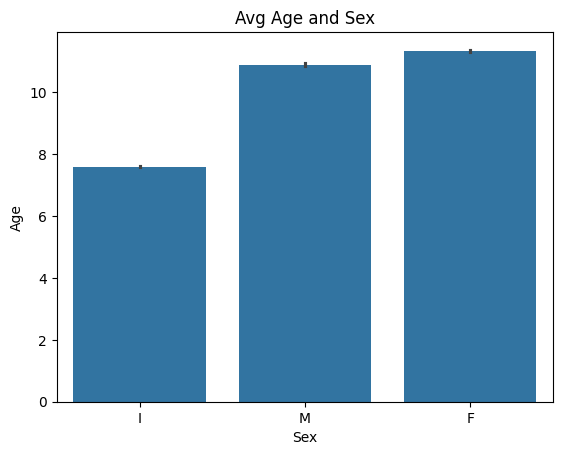

In [83]:
sns.barplot(x='Sex', y='Age', estimator=np.mean, data=df) #by default seaborn uses estimator as mean
#sns.barplot(x=df['Sex'], y=df['Age'])
plt.title('Avg Age and Sex')
plt.show()

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



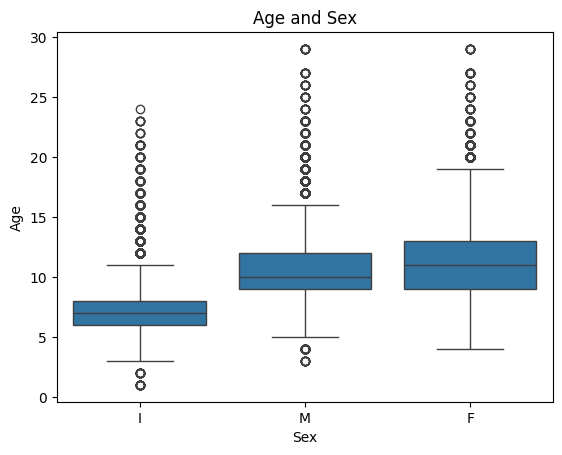

In [84]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age and Sex')
plt.show()

Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

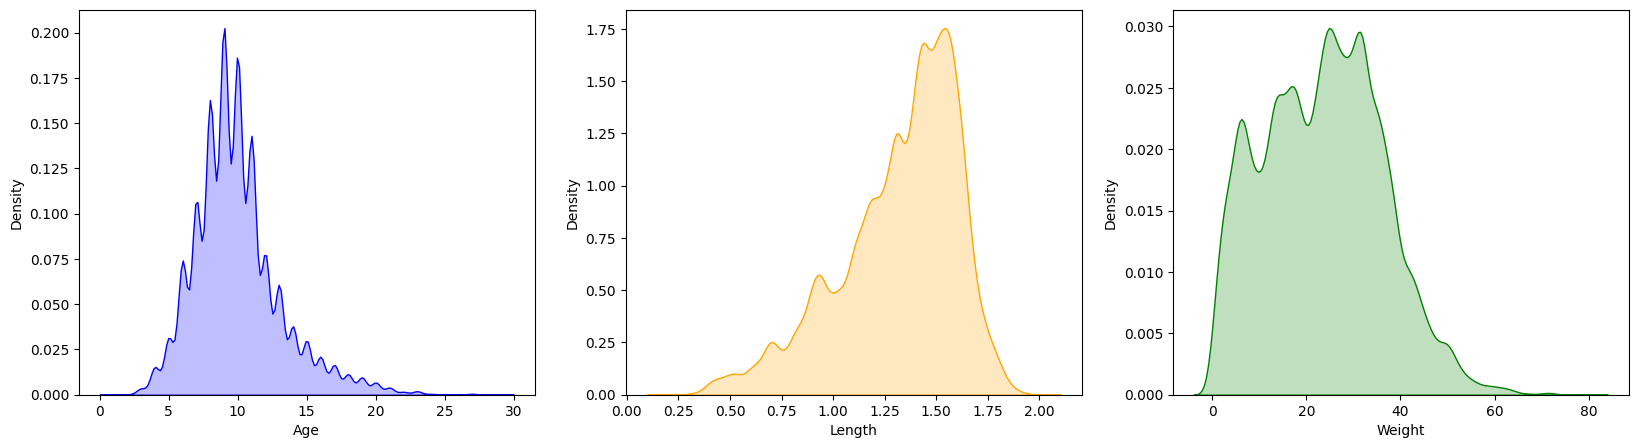

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.kdeplot(df['Age'], ax=ax[0] ,color='blue',fill='light blue')
sns.kdeplot(df['Length'], ax=ax[1],color='orange',fill='light orange')
sns.kdeplot(df['Weight'], ax=ax[2],color='green',fill='light green')
plt.show()

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

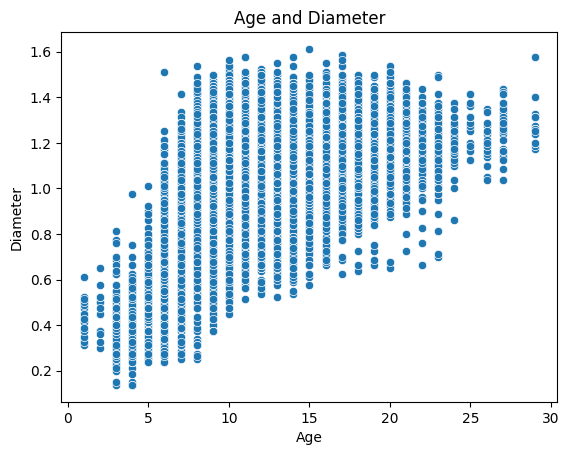

In [86]:
sns.scatterplot(x='Age', y='Diameter', data=df)
plt.title('Age and Diameter')
plt.show()

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [87]:
np.corrcoef(df['Age'], df['Length'])


array([[1.       , 0.6123739],
       [0.6123739, 1.       ]])

In [88]:
df_new=df.drop('Sex', axis=1,inplace=False)
df_new.corr() #bcoz it does not work on categorial data

Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.989418  0.918402  0.936407        0.915529   
Diameter        0.989418  1.000000  0.921415  0.938273        0.914199   
Height          0.918402  0.921415  1.000000  0.902231        0.864457   
Weight          0.936407  0.938273  0.902231  1.000000        0.971242   
Shucked Weight  0.915529  0.914199  0.864457  0.971242        1.000000   
Viscera Weight  0.917872  0.918357  0.883557  0.971037        0.942576   
Shell Weight    0.916954  0.922683  0.903847  0.965493        0.910317   
Age             0.612374  0.620800  0.637759  0.600839        0.502877   

                Viscera Weight  Shell Weight       Age  
Length                0.917872      0.916954  0.612374  
Diameter              0.918357      0.922683  0.620800  
Height                0.883557      0.903847  0.637759  
Weight                0.971037      0.965493  0.600839  
Shucked Weight        0.942576      0.910317  0.502877  
Viscera Weight        1.000000      0.933860  0.576436  
Shell Weight          0.933860      1.000000  0.663173  
Age                   0.576436      0.663173  1.000000

If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [89]:
df['Lost Weight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  Lost Weight  
0      8.348928    9     1.247378  
1      3.401940    8     0.170097  
2      6.662133    9     1.219029  
3     14.996885   11     4.316891  
4      5.953395    8     0.850485

To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

In [90]:
#sns.violinplot(x='Lost Weight', y='Age', data=df)
#plt.title('Age and Lost Weight')
#plt.show()

Text(0, 0.5, 'Age')

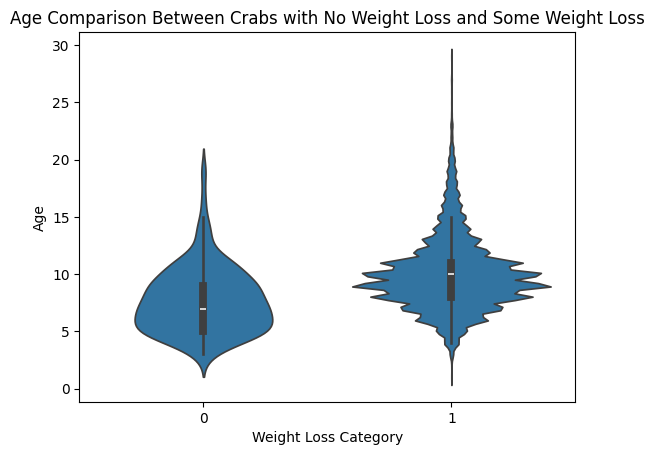

In [97]:
df['Weight Loss Category'] = df['Lost Weight'].apply(lambda x: 0 if x == 0 else 1)

sns.violinplot(x='Weight Loss Category', y='Age', data=df)
plt.title('Age Comparison Between Crabs with No Weight Loss and Some Weight Loss')
plt.xlabel('Weight Loss Category')
plt.ylabel('Age')

#make a plot of your own choosing!

Text(0, 0.5, 'Average Weight')

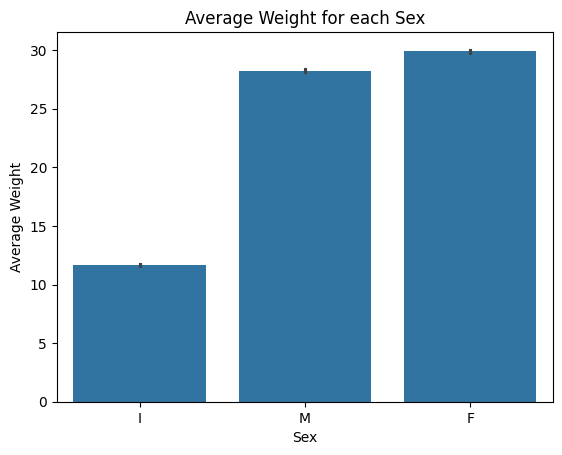

In [92]:
sns.barplot(x=df['Sex'], y=df['Weight'], estimator=np.mean)
plt.title('Average Weight for each Sex')
plt.xlabel('Sex')
plt.ylabel('Average Weight')

the average weight of females is a little more than that of tha males and the weight of the indeterminate gender is very less as compared to that of males and females.

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

as the age of the crab increases its surface area increases

#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [93]:
df=pd.get_dummies(df, columns=['Sex'])

In [94]:
df.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  Lost Weight Weight Loss Category  Sex_F  Sex_I  Sex_M  
0      8.348928    9     1.247378     Some Weight Loss  False   True  False  
1      3.401940    8     0.170097     Some Weight Loss  False   True  False  
2      6.662133    9     1.219029     Some Weight Loss  False  False   True  
3     14.996885   11     4.316891     Some Weight Loss   True  False  False  
4      5.953395    8     0.850485     Some Weight Loss  False   True  False

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [98]:
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0  0.732750  0.703390  0.128889  0.361254        0.301278        0.307185   
1  0.499914  0.466102  0.093333  0.129449        0.106590        0.106131   
2  0.657421  0.661017  0.128889  0.308837        0.268325        0.256427   
3  0.828624  0.864407  0.173333  0.632194        0.482179        0.509197   
4  0.582091  0.593220  0.115556  0.290243        0.283457        0.207647   

   Shell Weight       Age  Lost Weight  Weight Loss Category  Sex_F  Sex_I  \
0      0.291978  0.285714     0.383423                   1.0    0.0    1.0   
1      0.118087  0.250000     0.356036                   1.0    0.0    1.0   
2      0.232686  0.285714     0.382703                   1.0    0.0    0.0   
3      0.525660  0.357143     0.461459                   1.0    1.0    0.0   
4      0.207773  0.250000     0.373333                   1.0    0.0    1.0   

   Sex_M  
0    0.0  
1    0.0  
2    1.0  
3    0.0  
4    0.0

For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [99]:
df_std = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task1.csv")
df_std.drop('id', axis=1, inplace=True)
df_std=pd.get_dummies(df_std, columns=['Sex'])
df_std.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      8.348928    9  False   True  False  
1      3.401940    8  False   True  False  
2      6.662133    9  False  False   True  
3     14.996885   11   True  False  False  
4      5.953395    8  False   True  False

Standardise df_std such that the one hot label encoded columns aren't affected.

In [101]:
std_columns = ['Length', 'Diameter', 'Height','Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']
scaler = StandardScaler()
df_std[std_columns] = scaler.fit_transform(df_std[std_columns])
df_std.head()

Length  Diameter    Height     Weight  Shucked Weight  Viscera Weight  \
0  0.721238  0.633982  0.292400  28.973189        0.467188        0.569186   
1 -0.755712 -0.840356 -0.794163  10.418441       -0.993688       -0.978880   
2  0.243401  0.370707  0.292400  24.777463        0.219924        0.178363   
3  1.329394  1.634426  1.650603  50.660556        1.824616        2.124622   
4 -0.234435 -0.050532 -0.115061  23.289114        0.333464       -0.197233   

   Shell Weight       Age  Sex_F  Sex_I  Sex_M  
0      0.453376 -0.304805  False   True  False  
1     -0.926788 -0.619749  False   True  False  
2     -0.017224 -0.304805  False  False   True  
3      2.308095  0.325083   True  False  False  
4     -0.214955 -0.619749  False   True  False

#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

Label Encoding and One-Hot Encoding are two popular techniques used to convert categorical data into a numeric format that can be used for machine learning models

One Hot Encoding
One Hot Encoding(OHE), is an encoding technique for treating categorical variable, in which we create dummy features for each of the unique values of an already existing feature. For example if there exists a feature of Sex with unique values as M, F and I, by one hot encoding we can create dummy feature namely Sex_M, Sex_F, Sex_I. Once these features are created, based on the entries in the actual sex feature, the other 3 dummy features will be filled with values like True and False. If the sex is female, then the Sex_F feature will have True and the other two features will have False. This is the basic ideology behind One Hot Encoding.

One Hot Encoding can be suitable in situations where the ordinality of the feature is not a problem to be taken care of, like Sex, colors, etc. It is also often used alongside models which cannot underestand ordinality like linear regression, neural networks, KNN, etc.

Pros:
Does not assume the ordinality of the feature
Cons:
Increases dimensionality which makes it more complex to understand
Increases the memory space and computational time
Label Encoding
Label Encoding, is another encoding technique for treating categorical variables, in which we assign each of the unique entries of a feature with an integer. This can be done both automatically by using LabelEncoder() function or manually by using map function. When done using LabelEncoder(), the order of assigning integers to each unique entry is done by alphabetcal order, whereas when done manually using map function, we have the power to assign the integers to each of the unique entries. For example, if there exists a Sex feature with unique features as M, F and I. In this case, using label encoding we can assign M, F and I particular integers in order to convert them into numerical variables.

Label Encoding is suitable in situations where the ordinality of the feature plays a crucial role. For example, when the unique entries are high, medium and low. It is also often used alongside models which have the ability to understand the ordinal relation in the feature like decision trees.

Pros:
Lower memory is used and computaional power is also reduced significantly
The dimensionality remains the same, hence it is easier to understand
Cons:
It assigns an order to the feature, which can mislead the model into thinking that there exists a relation between them.


Label Encoding is preferable for ordinal data where categories follow a specific order or rank.
One-Hot Encoding is generally the better choice for nominal data to avoid misleading the model with any implied hierarchy among categories.





